# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:*  
- *Call Option – Spot Price Sensitivity:*  
- *Put Option – Time Sensitivity:*  
- *Put Option – Spot Price Sensitivity:*  

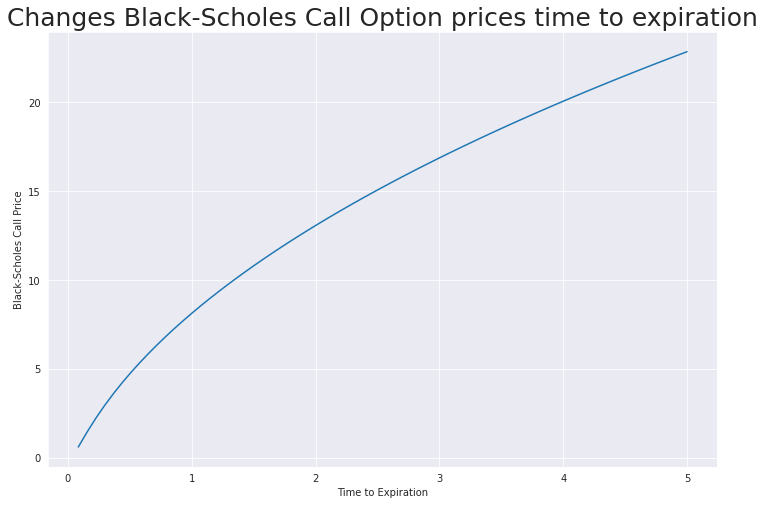

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

In [2]:
def Dcall_Dt(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the time derivative of Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -0.5*S0*norm.pdf(d1)*sigma/np.sqrt(t) - r*K*np.exp(-r*t)*norm.cdf(d2)

# a)

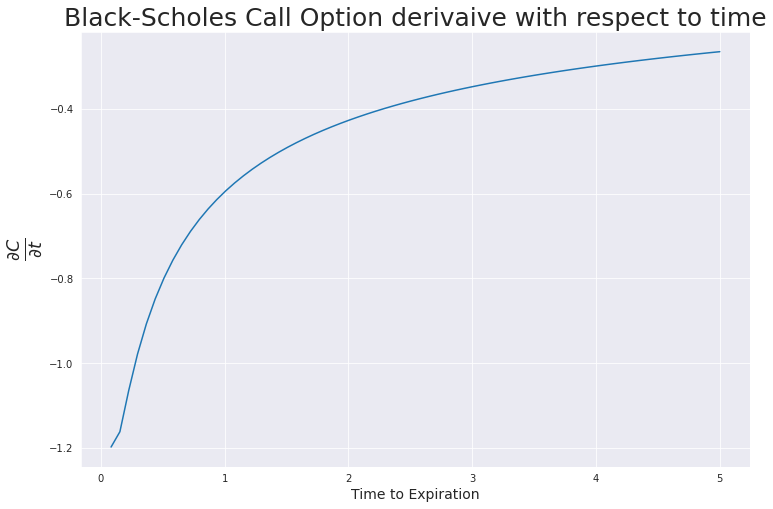

In [3]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


d_call_dt= np.array([Dcall_Dt(S0,K,sigma, t = times[i]) for i in range(len(times))])


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option derivaive with respect to time', size = 25)
plt.plot(times, d_call_dt/(sigma*sigma*K))
plt.xlabel('Time to Expiration',size=14)
plt.ylabel(r'$\frac{\partial C}{\partial t}$',size = 25)
plt.show()

### As could be seen from the first plot, the magnitude of the time derivative is   
### increasing as the time to expiration decreases and the sign of the derivative is negative.
# ------------------------------------------------------------------------------------------------------

### The plot above is a sanity check on those observations and indeed sanity checks.

# Why does this make sense:

In this case, we look at __for a fixed stock price__ what happens to the call option as time moves closer to     expiration. The stock is below the strike price for the call option and is therefore 
**out of the money**. So, as time moves forward, the stock has less and less chance to recover in the money,
and thus the option is worth less and less.

# b)

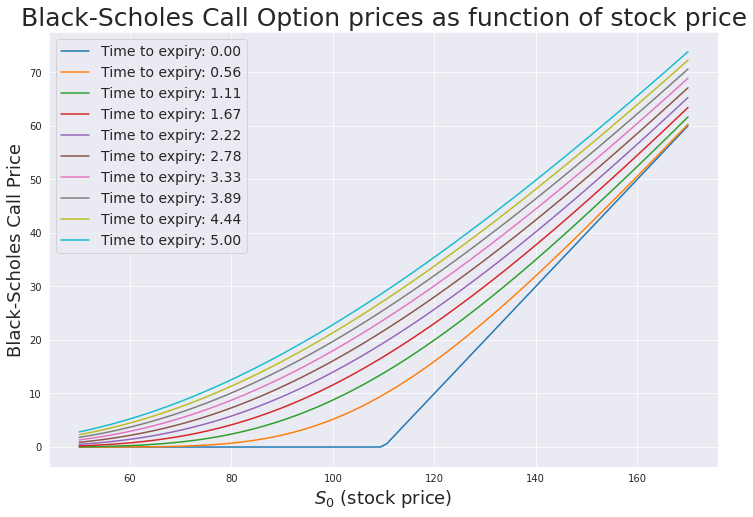

In [4]:
# S0 = 100
S0 = np.linspace(50,170,100)
K = 110
sigma = .3
times = np.linspace(0.0001, 5, 10)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Call Option prices as function of stock price', size = 25)
# plt.plot(times, call_prices)
for i,c in enumerate(call_prices):
    plt.plot(S0,c,label="Time to expiry: {:.2f}".format(times[i]))
plt.xlabel(r'$S_0$ (stock price)',size=18)
plt.ylabel('Black-Scholes Call Price',size=18)
plt.legend(loc='best',fontsize=14)
plt.show()

Again, this makes perfect sense. The farther option is from expiry, the more linear the the call price is across all stock prices because the stock may still end up anywhere since the variance grows in $t$, although, the expected value grows linearly in $S_0$. As time gets closer to expiry time, stock prices that are out of the moeny get pushed to 0, meanwhile stock prices tha are in the money get pushed to be exactly proportional to $K$.

# c)

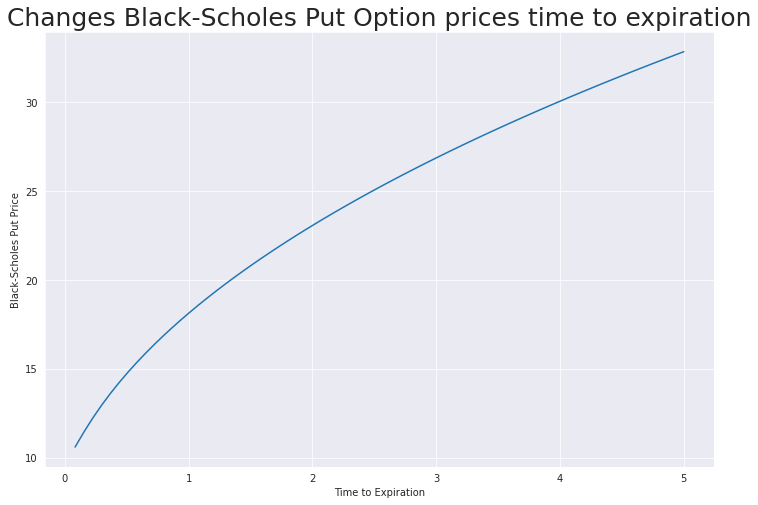

In [5]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Put Price')
plt.show()

In [6]:
def Dput_Dt(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the time derivative of Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -0.5*S0*norm.pdf(d1)*sigma/np.sqrt(t) + r*K*np.exp(-r*t)*norm.cdf(-d2)

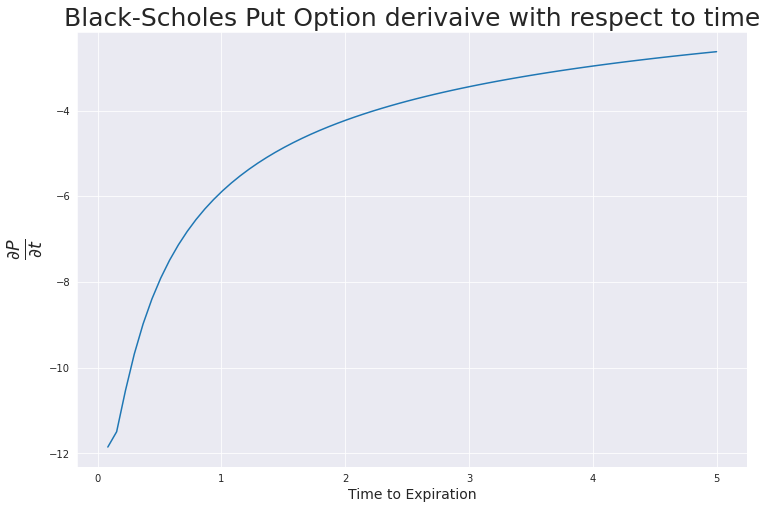

In [7]:
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


d_put_dt= [Dput_Dt(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option derivaive with respect to time', size = 25)
plt.plot(times, d_put_dt)
plt.xlabel('Time to Expiration',size=14)
plt.ylabel(r'$\frac{\partial P}{\partial t}$',size = 25)
plt.show()

Indeed we see the same behavior in time for the put option as compard to the call option. In this case, the stock is in the money and yet the price still decreases in time, **although notably does not end at $0$**. This makes sense because at earlier times, the stock has the opportunity to finish even deeper into the money, and thus is has value in this potential. When the expiration is reached, the option price should proportional to the strike price since the option is in the money, and thus will not finish at $0$, but at a finite value.

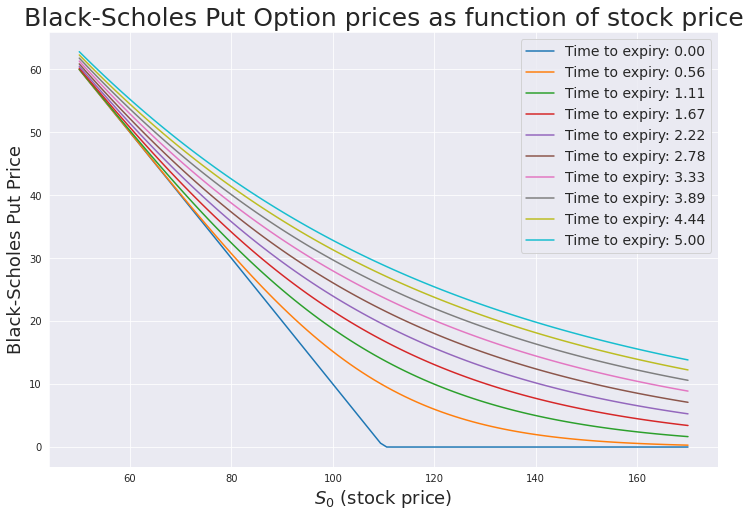

In [9]:
# S0 = 100
S0 = np.linspace(50,170,100)
K = 110
sigma = .3
times = np.linspace(0.0001, 5, 10)


call_prices = [bs_put(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Black-Scholes Put Option prices as function of stock price', size = 25)
# plt.plot(times, call_prices)
for i,c in enumerate(call_prices):
    plt.plot(S0,c,label="Time to expiry: {:.2f}".format(times[i]))
plt.xlabel(r'$S_0$ (stock price)',size=18)
plt.ylabel('Black-Scholes Put Price',size=18)
plt.legend(loc='best',fontsize=14)
plt.show()

As a function of stock price, we see what looks almost like a reflected version of the call options prices. This is a manifestatio of put-call parity. The explanations work the same, except in the money here is when $S_0$ is below the strike price, $K$ and out of the money, the oppostite. The main difference can be seen when $S_0\to0$. There you see that the put option price terminates at a finite value, whereas the call option price $C\to0$ as $S_0\to0$.